In [2]:
import pandas as pd
import time
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('temp_datalab_records_linkedin_company.csv')

C:\Users\19293\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(5)

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(2426196, 14)

In [6]:
df.isnull().sum()

dataset_id                     0
as_of_date                     0
company_name                   0
followers_count                0
employees_on_platform          0
link                           0
industry                   36265
date_added                     0
date_updated                   0
description              1825278
website                  1935971
entity_id                2426196
cusip                    2426196
isin                     2426196
dtype: int64

In [7]:
df['as_of_date'].unique()

array(['2015-09-14', '2015-09-15', '2015-09-16', ..., '2018-07-15',
       '2018-07-16', '2018-07-17'], dtype=object)

In [8]:
company_df = df[['company_name','employees_on_platform']].groupby('company_name').mean()
company_df.columns = ['number_employee']
company_df_sorted = company_df.sort_values(by = 'number_employee',ascending = False)

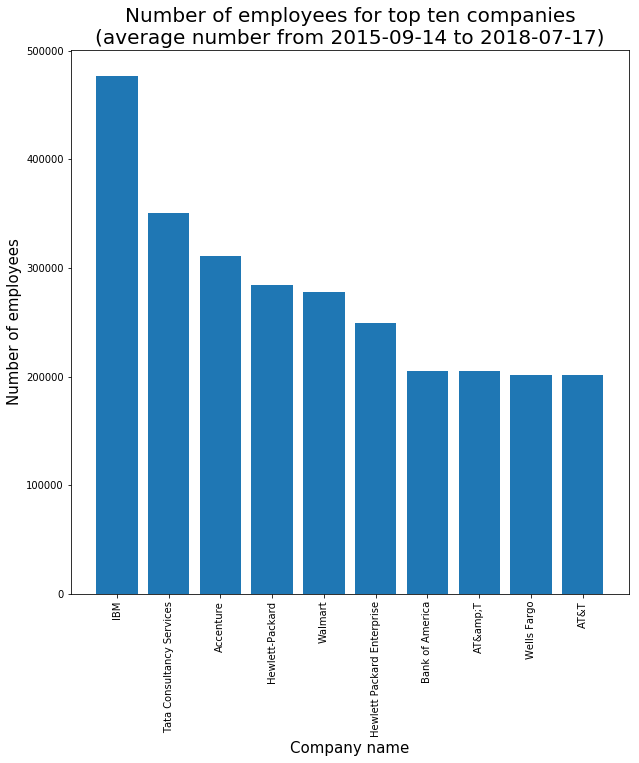

In [9]:
plt.figure(figsize = (10,10))
plt.title('Number of employees for top ten companies\n(average number from 2015-09-14 to 2018-07-17)',fontsize=20)
plt.bar(list(range(10)),company_df_sorted[:10]['number_employee'])
plt.xticks(list(range(10)), company_df_sorted[:10].index, rotation='vertical')
plt.ylabel('Number of employees',fontsize = 15)
plt.xlabel('Company name',fontsize = 15)
plt.savefig('employees.jpg')
plt.show()

In [10]:
company_df = df[['company_name','followers_count']].groupby('company_name').mean()
company_df.columns = ['number_followers']
company_df_sorted = company_df.sort_values(by = 'number_followers',ascending = False)

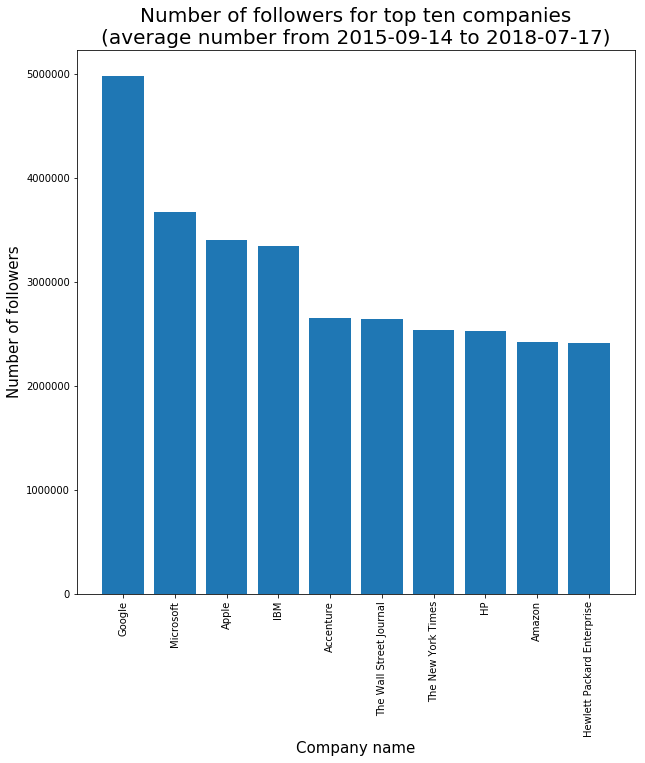

In [11]:
plt.figure(figsize = (10,10))
plt.title('Number of followers for top ten companies\n(average number from 2015-09-14 to 2018-07-17)',fontsize=20)
plt.bar(list(range(10)),company_df_sorted[:10]['number_followers'])
plt.xticks(list(range(10)), company_df_sorted[:10].index, rotation='vertical')
plt.ylabel('Number of followers',fontsize = 15)
plt.xlabel('Company name',fontsize = 15)
plt.savefig('followers.jpg')
plt.show()

In [11]:
IBM_df = df[df['company_name']=='IBM'][['as_of_date','followers_count','employees_on_platform']]
IBM_df['as_of_date'] = pd.to_datetime(IBM_df['as_of_date'])
IBM_df.set_index('as_of_date',inplace = True)

In [12]:
IBM_stock_weekly = pd.read_csv('EOD-IBM_weekly.csv')
IBM_stock_weekly['Date'] = pd.to_datetime(IBM_stock_weekly['Date'])
IBM_stock_daily = pd.read_csv('EOD-IBM_daily.csv')
IBM_stock_daily['Date'] = pd.to_datetime(IBM_stock_daily['Date'])
IBM_stock_monthly = pd.read_csv('EOD-IBM_monthly.csv')
IBM_stock_monthly['Date'] = pd.to_datetime(IBM_stock_monthly['Date'])

In [13]:
IBM_stock_daily['avg_price'] = (IBM_stock_daily['Open']+IBM_stock_daily['Close'])/2
IBM_df_daily = IBM_df.copy()
IBM_df_daily.reset_index(inplace = True)
IBM_df_daily.columns = ['Date', 'followers_count', 'employees_on_platform']
IBM_df_daily_merged = IBM_df_daily.merge(IBM_stock_daily[['Date','avg_price']],how ='left')
IBM_df_daily_merged.dropna(inplace = True)

C:\Users\19293\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


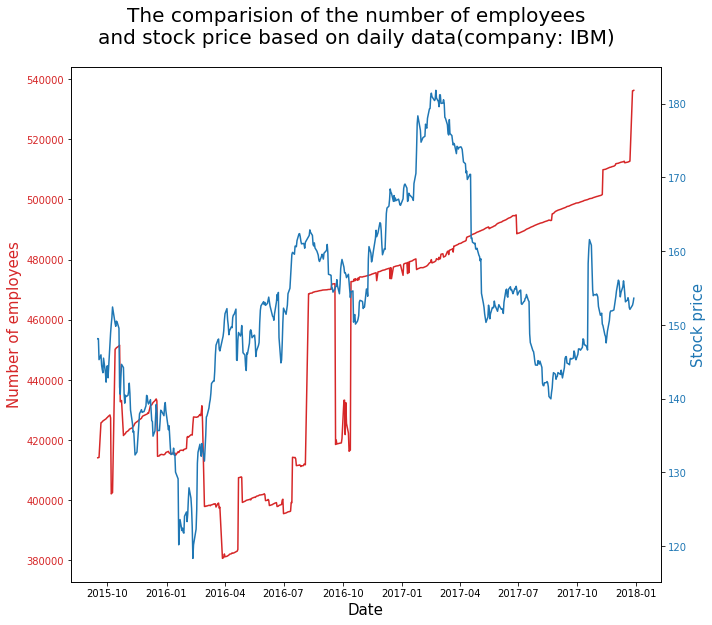

In [14]:
fig, ax1 = plt.subplots(figsize=(10,8))
color = 'tab:red'
ax1.set_xlabel('Date',fontsize = 15)
ax1.set_ylabel('Number of employees', color=color,fontsize = 15)
ax1.plot(IBM_df_daily_merged['Date'], IBM_df_daily_merged['employees_on_platform'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Stock price', color=color,fontsize = 15)
ax2.plot(IBM_df_daily_merged['Date'], IBM_df_daily_merged['avg_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
my_suptitle = fig.suptitle('The comparision of the number of employees\nand stock price based on daily data(company: IBM)',fontsize=20,y=1.08)
fig.savefig('daily_IBM.png',dpi=fig.dpi, bbox_inches='tight',bbox_extra_artists=[my_suptitle])
plt.show()


In [15]:
IBM_stock_weekly['avg_price'] = (IBM_stock_weekly['Open']+IBM_stock_weekly['Close'])/2
IBM_df_weekly = IBM_df.resample('W').mean()
IBM_df_weekly.reset_index(inplace = True)
IBM_df_weekly.columns = ['Date', 'followers_count', 'employees_on_platform']
IBM_df_weekly_merged = IBM_df_weekly.merge(IBM_stock_weekly[['Date','avg_price']],how ='left')
IBM_df_weekly_merged.dropna(inplace = True)

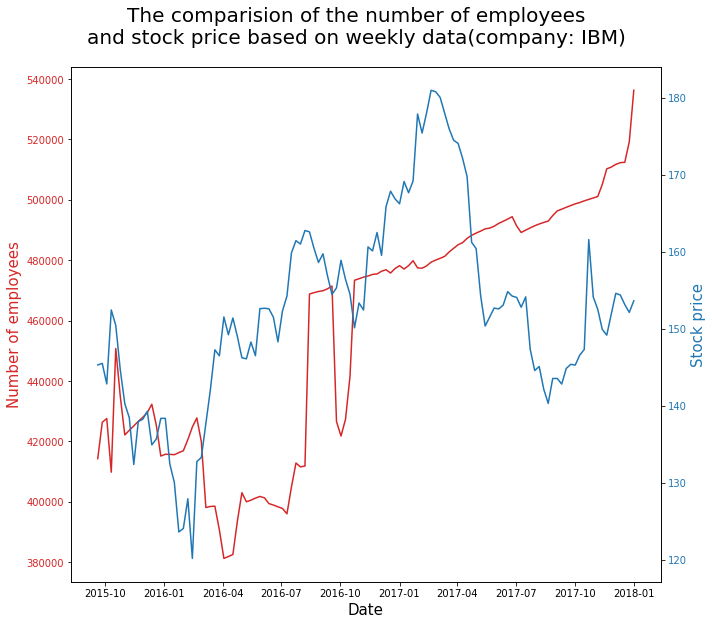

In [16]:
fig, ax1 = plt.subplots(figsize=(10,8))
color = 'tab:red'
ax1.set_xlabel('Date',fontsize = 15)
ax1.set_ylabel('Number of employees', color=color,fontsize = 15)
ax1.plot(IBM_df_weekly_merged['Date'], IBM_df_weekly_merged['employees_on_platform'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Stock price', color=color,fontsize = 15)
ax2.plot(IBM_df_weekly_merged['Date'], IBM_df_weekly_merged['avg_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
my_suptitle = fig.suptitle('The comparision of the number of employees\nand stock price based on weekly data(company: IBM)',fontsize=20,y=1.08)
fig.savefig('weekly_IBM.png',dpi=fig.dpi, bbox_inches='tight',bbox_extra_artists=[my_suptitle])
plt.show()

In [17]:
IBM_stock_monthly['avg_price'] = (IBM_stock_monthly['Open']+IBM_stock_monthly['Close'])/2
IBM_df_monthly = IBM_df.resample('M').mean()
IBM_df_monthly.reset_index(inplace = True)
IBM_df_monthly.columns = ['Date', 'followers_count', 'employees_on_platform']
IBM_df_monthly_merged = IBM_df_monthly.merge(IBM_stock_monthly[['Date','avg_price']],how ='left')
IBM_df_monthly_merged.dropna(inplace = True)

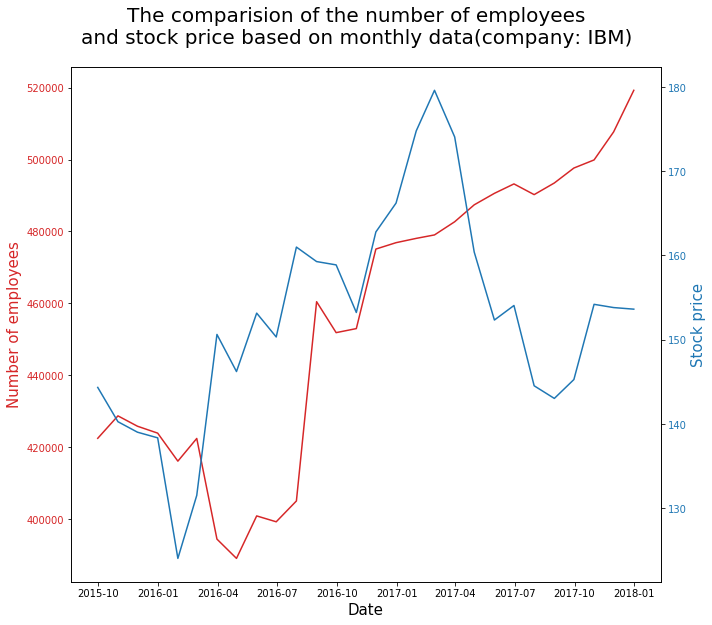

In [18]:
fig, ax1 = plt.subplots(figsize=(10,8))
color = 'tab:red'
ax1.set_xlabel('Date',fontsize = 15)
ax1.set_ylabel('Number of employees', color=color,fontsize = 15)
ax1.plot(IBM_df_monthly_merged['Date'], IBM_df_monthly_merged['employees_on_platform'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Stock price', color=color,fontsize = 15)
ax2.plot(IBM_df_monthly_merged['Date'], IBM_df_monthly_merged['avg_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
my_suptitle = fig.suptitle('The comparision of the number of employees\nand stock price based on monthly data(company: IBM)',fontsize=20,y=1.08)
fig.savefig('monthly_IBM.png',dpi=fig.dpi, bbox_inches='tight',bbox_extra_artists=[my_suptitle])
plt.show()

In [19]:
WMT_df = df[df['company_name']=='Walmart'][['as_of_date','followers_count','employees_on_platform']]
WMT_df['as_of_date'] = pd.to_datetime(WMT_df['as_of_date'])
WMT_df.set_index('as_of_date',inplace = True)

In [20]:
WMT_stock_weekly = pd.read_csv('EOD-WMT_weekly.csv')
WMT_stock_weekly['Date'] = pd.to_datetime(WMT_stock_weekly['Date'])
WMT_stock_daily = pd.read_csv('EOD-WMT_daily.csv')
WMT_stock_daily['Date'] = pd.to_datetime(WMT_stock_daily['Date'])
WMT_stock_monthly = pd.read_csv('EOD-WMT_monthly.csv')
WMT_stock_monthly['Date'] = pd.to_datetime(WMT_stock_monthly['Date'])

In [21]:
WMT_stock_daily['avg_price'] = (WMT_stock_daily['Open']+WMT_stock_daily['Close'])/2
WMT_df_daily = WMT_df.copy()
WMT_df_daily.reset_index(inplace = True)
WMT_df_daily.columns = ['Date', 'followers_count', 'employees_on_platform']
WMT_df_daily_merged = WMT_df_daily.merge(WMT_stock_daily[['Date','avg_price']],how ='left')
WMT_df_daily_merged.dropna(inplace = True)

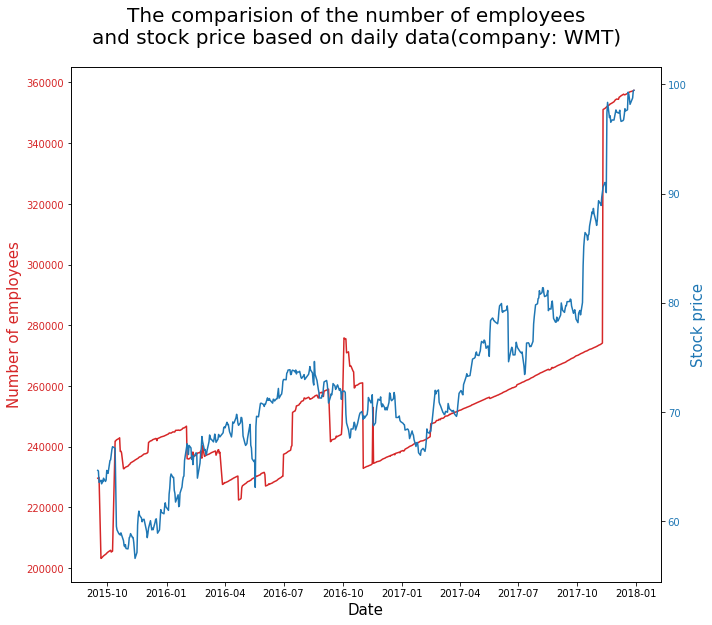

In [22]:
fig, ax1 = plt.subplots(figsize=(10,8))
color = 'tab:red'
ax1.set_xlabel('Date',fontsize = 15)
ax1.set_ylabel('Number of employees', color=color,fontsize = 15)
ax1.plot(WMT_df_daily_merged['Date'], WMT_df_daily_merged['employees_on_platform'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Stock price', color=color,fontsize = 15)
ax2.plot(WMT_df_daily_merged['Date'], WMT_df_daily_merged['avg_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
my_suptitle = fig.suptitle('The comparision of the number of employees\nand stock price based on daily data(company: WMT)',fontsize=20,y=1.08)
fig.savefig('daily_WMT.png',dpi=fig.dpi, bbox_inches='tight',bbox_extra_artists=[my_suptitle])
plt.show()


In [23]:
WMT_stock_weekly['avg_price'] = (WMT_stock_weekly['Open']+WMT_stock_weekly['Close'])/2
WMT_df_weekly = WMT_df.resample('W').mean()
WMT_df_weekly.reset_index(inplace = True)
WMT_df_weekly.columns = ['Date', 'followers_count', 'employees_on_platform']
WMT_df_weekly_merged = WMT_df_weekly.merge(WMT_stock_weekly[['Date','avg_price']],how ='left')
WMT_df_weekly_merged.dropna(inplace = True)

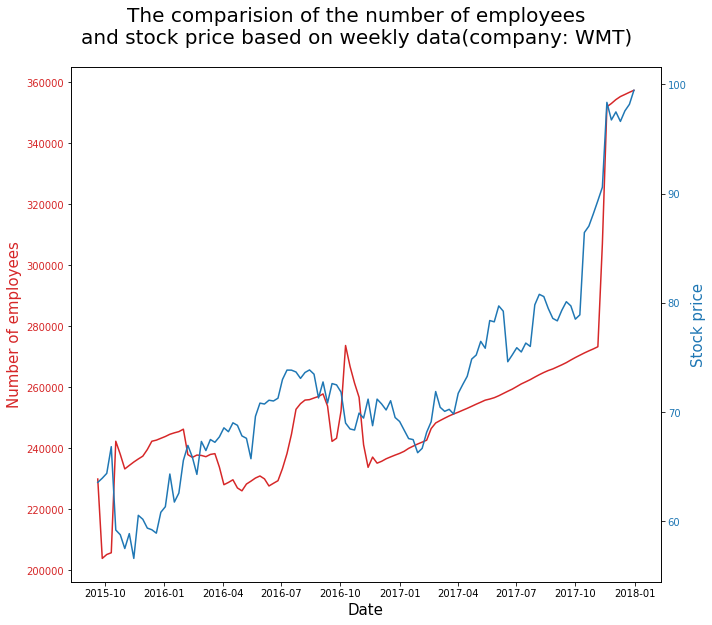

In [24]:
fig, ax1 = plt.subplots(figsize=(10,8))
color = 'tab:red'
ax1.set_xlabel('Date',fontsize = 15)
ax1.set_ylabel('Number of employees', color=color,fontsize = 15)
ax1.plot(WMT_df_weekly_merged['Date'], WMT_df_weekly_merged['employees_on_platform'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Stock price', color=color,fontsize = 15)
ax2.plot(WMT_df_weekly_merged['Date'], WMT_df_weekly_merged['avg_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
my_suptitle = fig.suptitle('The comparision of the number of employees\nand stock price based on weekly data(company: WMT)',fontsize=20,y=1.08)
fig.savefig('weekly_WMT.png',dpi=fig.dpi, bbox_inches='tight',bbox_extra_artists=[my_suptitle])
plt.show()

In [25]:
WMT_stock_monthly['avg_price'] = (WMT_stock_monthly['Open']+WMT_stock_monthly['Close'])/2
WMT_df_monthly = WMT_df.resample('M').mean()
WMT_df_monthly.reset_index(inplace = True)
WMT_df_monthly.columns = ['Date', 'followers_count', 'employees_on_platform']
WMT_df_monthly_merged = WMT_df_monthly.merge(WMT_stock_monthly[['Date','avg_price']],how ='left')
WMT_df_monthly_merged.dropna(inplace = True)

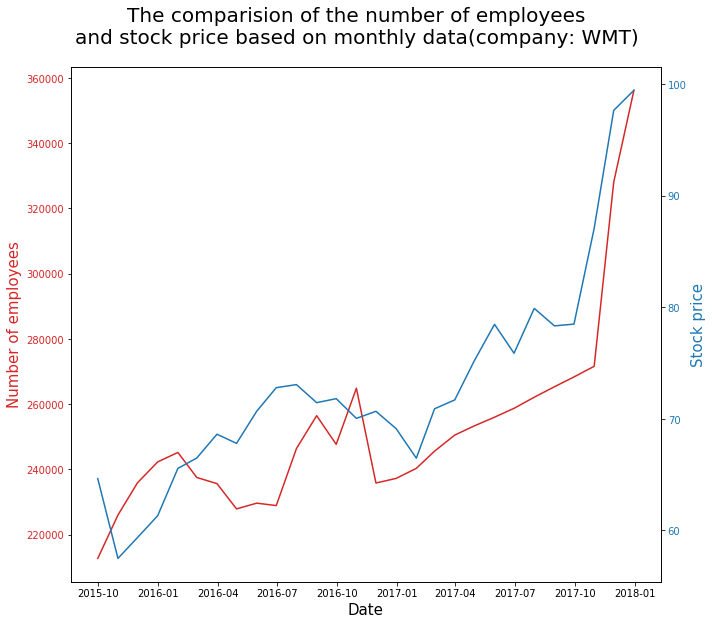

In [26]:
fig, ax1 = plt.subplots(figsize=(10,8))
color = 'tab:red'
ax1.set_xlabel('Date',fontsize = 15)
ax1.set_ylabel('Number of employees', color=color,fontsize = 15)
ax1.plot(WMT_df_monthly_merged['Date'], WMT_df_monthly_merged['employees_on_platform'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Stock price', color=color,fontsize = 15)
ax2.plot(WMT_df_monthly_merged['Date'], WMT_df_monthly_merged['avg_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
my_suptitle = fig.suptitle('The comparision of the number of employees\nand stock price based on monthly data(company: WMT)',fontsize=20,y=1.08)
fig.savefig('monthly_WMT.png',dpi=fig.dpi, bbox_inches='tight',bbox_extra_artists=[my_suptitle])
plt.show()